In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=torchvision.datasets.CIFAR10(root="/data",train=True,download=True,transform=transform)
testset=torchvision.datasets.CIFAR10(root="/data",train=False,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=5,shuffle=True,num_workers=2)
testloader=torch.utils.data.DataLoader(testset,batch_size=3000,shuffle=False,num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /data/cifar-10-python.tar.gz to /data
Files already downloaded and verified


In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
def testing_performace(model,testloader,classes):
  batch_size=1000
  micro_average_accuracy=0
  correct_samples=0
  incorrect_samples=0
  correct_pred={i:0 for i in classes}
  total_pred={i:0 for i in classes}
  
  with torch.no_grad():
    for data in testloader:
      images,labels=data
      outputs=model(images)
      predictions=torch.argmax(model(images),1)
      for i in range(batch_size):
        if predictions[i]==labels[i]:
          correct_pred[classes[labels[i].item()]]+=1
          correct_samples+=1
        else:
          incorrect_samples+=1
        total_pred[classes[labels[i].item()]]+=1
  
  for i in classes:
  #  micro_average_accuracy+=correct_pred[i]/total_pred[i]
    print("Accuracy of class ",i," : ",correct_pred[i]/total_pred[i])
  
  #micro_average_accuracy=micro_average_accuracy/len(classes)
  print("\n")
  #print("Microaverage accuracy:",micro_average_accuracy)
  print("Macroaverage accuracy:",correct_samples/(correct_samples+incorrect_samples))


A. Conv-Pool-Conv-Pool-Conv-Pool

In [6]:
class A(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool1=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,14,5)
    self.conv3=nn.Conv2d(14,10,3)
  def forward(self,x):
    x=self.pool1(self.conv1(x))
    x=self.pool1(self.conv2(x))
    x=self.pool1(self.conv3(x))
    x = torch.flatten(x, 1)
    return x

In [7]:
netA=A()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(netA.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):
  running_loss=0.0
  for i,data in enumerate(trainloader):
    inputs,labels=data
    optimizer.zero_grad()
    outputs=netA(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print("Finished Training")

[1,  2000] loss: 1.985
[1,  4000] loss: 1.763
[1,  6000] loss: 1.662
[1,  8000] loss: 1.616
[1, 10000] loss: 1.575
[2,  2000] loss: 1.518
[2,  4000] loss: 1.531
[2,  6000] loss: 1.503
[2,  8000] loss: 1.471
[2, 10000] loss: 1.464
[3,  2000] loss: 1.452
[3,  4000] loss: 1.442
[3,  6000] loss: 1.431
[3,  8000] loss: 1.422
[3, 10000] loss: 1.412
[4,  2000] loss: 1.393
[4,  4000] loss: 1.391
[4,  6000] loss: 1.396
[4,  8000] loss: 1.398
[4, 10000] loss: 1.398
[5,  2000] loss: 1.379
[5,  4000] loss: 1.378
[5,  6000] loss: 1.387
[5,  8000] loss: 1.355
[5, 10000] loss: 1.386
[6,  2000] loss: 1.328
[6,  4000] loss: 1.365
[6,  6000] loss: 1.353
[6,  8000] loss: 1.383
[6, 10000] loss: 1.370
[7,  2000] loss: 1.322
[7,  4000] loss: 1.345
[7,  6000] loss: 1.367
[7,  8000] loss: 1.326
[7, 10000] loss: 1.371
[8,  2000] loss: 1.324
[8,  4000] loss: 1.345
[8,  6000] loss: 1.341
[8,  8000] loss: 1.345
[8, 10000] loss: 1.322
[9,  2000] loss: 1.312
[9,  4000] loss: 1.342
[9,  6000] loss: 1.344
[9,  8000] 

In [ ]:
testing_performace(netA,testloader,classes)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4fe100ae60>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4fe100ae60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    self._shutdown_workers()
    if w.is_alive():
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    if w.is_alive():
    assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in

Accuracy of class  plane  :  0.4988009592326139
Accuracy of class  car  :  0.6062176165803109
Accuracy of class  bird  :  0.4358353510895884
Accuracy of class  cat  :  0.25984251968503935
Accuracy of class  deer  :  0.3263157894736842
Accuracy of class  dog  :  0.4010152284263959
Accuracy of class  frog  :  0.7493540051679587
Accuracy of class  horse  :  0.6310679611650486
Accuracy of class  ship  :  0.5980392156862745
Accuracy of class  truck  :  0.6398104265402843


Macroaverage accuracy: 0.51675


In [ ]:
labels

tensor([3, 8, 8,  ..., 2, 5, 6])

B. Conv-Conv-Pool-Conv-Conv-Pool

In [9]:
class B(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool1=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,10,5)
    self.conv3=nn.Conv2d(10,3,2)
    self.conv4=nn.Conv2d(3,10,10)
  def forward(self,x):
    x=self.conv1(x)
    x=self.pool1(self.conv2(x))
    x=self.conv3(x)
    x=self.pool1(self.conv4(x))
    x = torch.flatten(x, 1)
    return x

In [10]:
netB=B()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(netB.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):
  running_loss=0.0
  for i,data in enumerate(trainloader):
    inputs,labels=data
    optimizer.zero_grad()
    outputs=netB(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print("Finished Training")

[1,  2000] loss: 1.942
[1,  4000] loss: 1.765
[1,  6000] loss: 1.684
[1,  8000] loss: 1.609
[1, 10000] loss: 1.569
[2,  2000] loss: 1.566
[2,  4000] loss: 1.550
[2,  6000] loss: 1.531
[2,  8000] loss: 1.513
[2, 10000] loss: 1.506
[3,  2000] loss: 1.473
[3,  4000] loss: 1.492
[3,  6000] loss: 1.478
[3,  8000] loss: 1.490
[3, 10000] loss: 1.473
[4,  2000] loss: 1.440
[4,  4000] loss: 1.455
[4,  6000] loss: 1.479
[4,  8000] loss: 1.462
[4, 10000] loss: 1.470
[5,  2000] loss: 1.438
[5,  4000] loss: 1.447
[5,  6000] loss: 1.443
[5,  8000] loss: 1.468
[5, 10000] loss: 1.446
[6,  2000] loss: 1.433
[6,  4000] loss: 1.440
[6,  6000] loss: 1.443
[6,  8000] loss: 1.444
[6, 10000] loss: 1.441
[7,  2000] loss: 1.424
[7,  4000] loss: 1.440
[7,  6000] loss: 1.431
[7,  8000] loss: 1.439
[7, 10000] loss: 1.449
[8,  2000] loss: 1.440
[8,  4000] loss: 1.441
[8,  6000] loss: 1.424
[8,  8000] loss: 1.412
[8, 10000] loss: 1.425
[9,  2000] loss: 1.424
[9,  4000] loss: 1.427
[9,  6000] loss: 1.429
[9,  8000] 

In [ ]:
testing_performace(netB,testloader,classes)

Accuracy of class  plane  :  0.5971223021582733
Accuracy of class  car  :  0.5958549222797928
Accuracy of class  bird  :  0.43825665859564167
Accuracy of class  cat  :  0.33070866141732286
Accuracy of class  deer  :  0.3631578947368421
Accuracy of class  dog  :  0.3604060913705584
Accuracy of class  frog  :  0.6744186046511628
Accuracy of class  horse  :  0.49514563106796117
Accuracy of class  ship  :  0.5784313725490197
Accuracy of class  truck  :  0.6492890995260664


Macroaverage accuracy: 0.51025


C. Conv-Pool-Conv-Pool-Conv-Pool-FC-FC

> Indented block



In [11]:
class C(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool1=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.conv3=nn.Conv2d(16,20,2)
    self.fc1=nn.Linear(80,40)
    self.fc2=nn.Linear(40,10)
  def forward(self,x):
    x=self.pool1(self.conv1(x))
    x=self.pool1(self.conv2(x))
    x=self.pool1(self.conv3(x))
    x = torch.flatten(x, 1)
    x=self.fc1(x)
    x=self.fc2(x)
    return x

In [12]:
netC=C()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(netC.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):
  running_loss=0.0
  for i,data in enumerate(trainloader):
    inputs,labels=data
    optimizer.zero_grad()
    outputs=netC(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print("Finished Training")

[1,  2000] loss: 2.025
[1,  4000] loss: 1.760
[1,  6000] loss: 1.606
[1,  8000] loss: 1.549
[1, 10000] loss: 1.485
[2,  2000] loss: 1.470
[2,  4000] loss: 1.442
[2,  6000] loss: 1.419
[2,  8000] loss: 1.403
[2, 10000] loss: 1.381
[3,  2000] loss: 1.371
[3,  4000] loss: 1.364
[3,  6000] loss: 1.346
[3,  8000] loss: 1.334
[3, 10000] loss: 1.311
[4,  2000] loss: 1.287
[4,  4000] loss: 1.302
[4,  6000] loss: 1.290
[4,  8000] loss: 1.303
[4, 10000] loss: 1.283
[5,  2000] loss: 1.265
[5,  4000] loss: 1.260
[5,  6000] loss: 1.263
[5,  8000] loss: 1.256
[5, 10000] loss: 1.252
[6,  2000] loss: 1.218
[6,  4000] loss: 1.214
[6,  6000] loss: 1.239
[6,  8000] loss: 1.248
[6, 10000] loss: 1.238
[7,  2000] loss: 1.210
[7,  4000] loss: 1.216
[7,  6000] loss: 1.224
[7,  8000] loss: 1.215
[7, 10000] loss: 1.223
[8,  2000] loss: 1.175
[8,  4000] loss: 1.202
[8,  6000] loss: 1.211
[8,  8000] loss: 1.223
[8, 10000] loss: 1.215
[9,  2000] loss: 1.184
[9,  4000] loss: 1.178
[9,  6000] loss: 1.214
[9,  8000] 

In [ ]:
testing_performace(netC,testloader,classes)

Accuracy of class  plane  :  0.6354916067146283
Accuracy of class  car  :  0.7461139896373057
Accuracy of class  bird  :  0.3898305084745763
Accuracy of class  cat  :  0.29658792650918636
Accuracy of class  deer  :  0.45789473684210524
Accuracy of class  dog  :  0.5431472081218274
Accuracy of class  frog  :  0.8165374677002584
Accuracy of class  horse  :  0.6019417475728155
Accuracy of class  ship  :  0.7230392156862745
Accuracy of class  truck  :  0.5639810426540285


Macroaverage accuracy: 0.578


In [13]:
network_size=sum(p.numel() for p in netA.parameters()),sum(p.numel() for p in netB.parameters()),sum(p.numel() for p in netC.parameters())
acc=[0.51675,0.51025,0.578]
loss=[1.327,1.432,1.196]

Text(0, 0.5, 'Testing Accuracy')

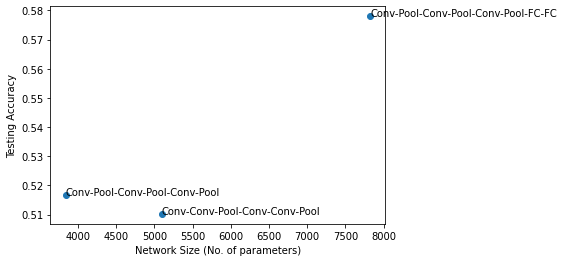

In [21]:
plt.scatter(network_size,acc)
for i in range(3):
  plt.text(x=network_size[i],y=acc[i],s=["Conv-Pool-Conv-Pool-Conv-Pool","Conv-Conv-Pool-Conv-Conv-Pool","Conv-Pool-Conv-Pool-Conv-Pool-FC-FC"][i])
plt.xlabel("Network Size (No. of parameters)")
plt.ylabel("Testing Accuracy")

In [25]:
layers=[3,2,4]

Text(0, 0.5, 'Testing Accuracy')

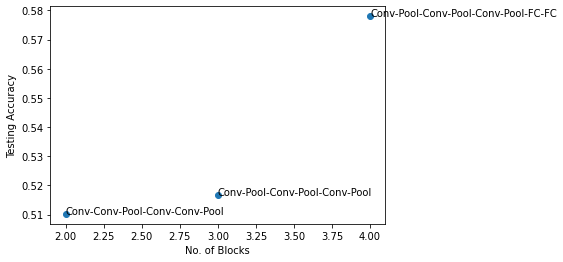

In [26]:
plt.scatter(layers,acc)
for i in range(3):
  plt.text(x=layers[i],y=acc[i],s=["Conv-Pool-Conv-Pool-Conv-Pool","Conv-Conv-Pool-Conv-Conv-Pool","Conv-Pool-Conv-Pool-Conv-Pool-FC-FC"][i])
plt.xlabel("No. of Blocks")
plt.ylabel("Testing Accuracy")

Text(0, 0.5, 'Testing Accuracy')

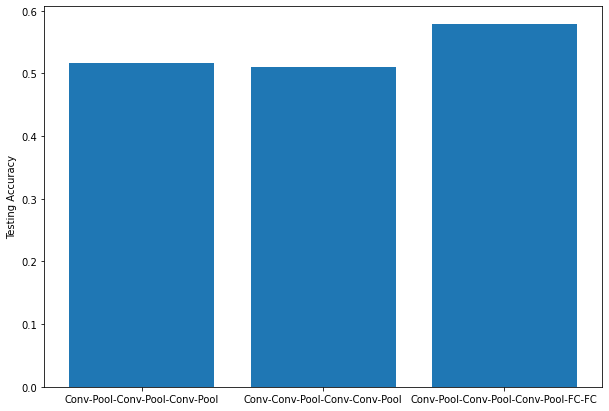

In [14]:
plt.figure(figsize=(10,7))
plt.bar(["Conv-Pool-Conv-Pool-Conv-Pool","Conv-Conv-Pool-Conv-Conv-Pool","Conv-Pool-Conv-Pool-Conv-Pool-FC-FC"],acc)
plt.ylabel("Testing Accuracy")

Text(0, 0.5, 'Training Loss')

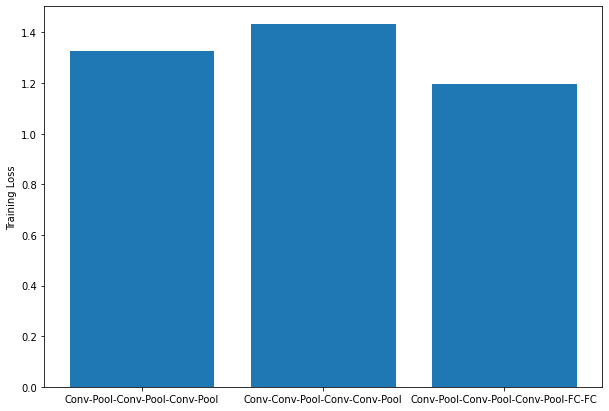

In [15]:
plt.figure(figsize=(10,7))
plt.bar(["Conv-Pool-Conv-Pool-Conv-Pool","Conv-Conv-Pool-Conv-Conv-Pool","Conv-Pool-Conv-Pool-Conv-Pool-FC-FC"],loss)
plt.ylabel("Training Loss")

# Pooling

In [ ]:
device="cuda"

In [ ]:
class D(nn.Module):
  def __init__(self,pooling_size1,out):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool1=nn.MaxPool2d(pooling_size1,1)
    self.conv2=nn.Conv2d(6,16,5)
    self.conv3=nn.Conv2d(16,20,2)
    self.fc1=nn.Linear(out,40)
    self.fc2=nn.Linear(40,10)
  def forward(self,x):
    x=self.pool1(self.conv1(x))
    x=self.pool1(self.conv2(x))
    x=self.pool1(self.conv3(x))
    x= torch.flatten(x, 1)
    x=self.fc1(x)
    x=self.fc2(x)
    return x

In [ ]:
dataiter=iter(testloader)
images, labels = dataiter.next()

In [ ]:
NetD=D(9,5700)

In [ ]:
if torch.argmax(NetD(images),1)[2]==labels[2]:
  print("*")

In [ ]:
pooling_size=[2,3,4,5,6,7,8]
out=[8000,5780,3920,2420,1280,500,80]
models=[D(pooling_size[i],out[i]) for i in range(7)]

In [ ]:
def return_testing_performace(model,testloader,classes):
  batch_size=1000
  micro_average_accuracy=0
  correct_samples=0
  incorrect_samples=0
  correct_pred={i:0 for i in classes}
  total_pred={i:0 for i in classes}
  
  with torch.no_grad():
    for data in testloader:
      images,labels=data
      images,labels=images.to(device),labels.to(device)
      outputs=model(images)
      predictions=torch.argmax(model(images),1)
      for i in range(batch_size):
        if predictions[i]==labels[i]:
          correct_pred[classes[labels[i].item()]]+=1
          correct_samples+=1
        else:
          incorrect_samples+=1
        total_pred[classes[labels[i].item()]]+=1
  return(correct_samples/(correct_samples+incorrect_samples))

In [ ]:
training_loss=[]
testing_accuracy=[]


for pooling_size in range(7):
  NetD=models[pooling_size]
  NetD=NetD.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(NetD.parameters(), lr=0.001, momentum=0.9)
  losses=[]
  for epoch in range(10):
    running_loss=0.0
    for i,data in enumerate(trainloader):
      inputs,labels=data
      inputs,labels=inputs.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=NetD(inputs)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
      losses.append(running_loss)
      running_loss = 0.0
  print("Finished Training for pool size:",pooling_size)
  acc=return_testing_performace(NetD,testloader,classes)
  testing_accuracy.append(acc)
  training_loss.append(losses)

Finished Training for pool size: 0
Finished Training for pool size: 1
Finished Training for pool size: 2
Finished Training for pool size: 3
Finished Training for pool size: 4
Finished Training for pool size: 5
Finished Training for pool size: 6


In [ ]:
#training_loss[0][-1]

Text(0, 0.5, 'Training Loss')

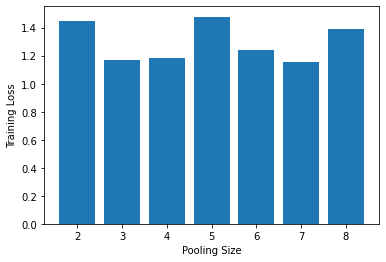

In [ ]:
import numpy as np
loss=[]
for i in training_loss:
  loss.append(np.mean(i[-10:]))
  
plt.bar(np.arange(2,9),loss)
plt.xlabel("Pooling Size")
plt.ylabel("Training Loss")

In [ ]:
training_loss[6][-1]

1.9402859210968018

In [ ]:
testing_accuracy

[0.524, 0.5575, 0.5515, 0.56625, 0.52875, 0.50075, 0.492]

In [ ]:
#loss

In [ ]:
np.mean(training_loss[0][-5:])

1.5655224800109864

Text(0, 0.5, 'Testing Accuracy')

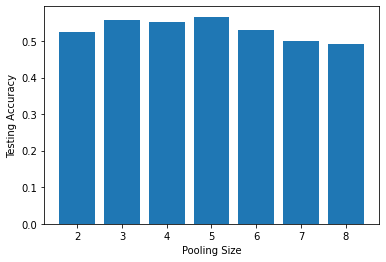

In [ ]:
import numpy as np
plt.bar(np.arange(2,9),testing_accuracy)
plt.xlabel("Pooling Size")
plt.ylabel("Testing Accuracy")

In [ ]:
testing_accuracy

[0.10425, 0.10425, 0.10425, 0.10425, 0.10425, 0.10425, 0.22525]